In [ ]:
%install '.package(path: "$cwd/FastaiNotebooks")' FastaiNotebooks

Installing packages:
	.package(path: "/home/ubuntu/notebooks/swift/FastaiNotebooks")
		FastaiNotebooks
Working in: /tmp/tmpqraz_0j3
Fetching https://github.com/mxcl/Path.swift
Fetching https://github.com/JustHTTP/Just
Completed resolution in 1.39s
Cloning https://github.com/mxcl/Path.swift
Resolving https://github.com/mxcl/Path.swift at 0.16.2
Cloning https://github.com/JustHTTP/Just
Resolving https://github.com/JustHTTP/Just at 0.7.1
Compile Swift Module 'Just' (1 sources)
Compile Swift Module 'Path' (9 sources)
Compile Swift Module 'FastaiNotebooks' (2 sources)
Compile Swift Module 'jupyterInstalledPackages' (1 sources)
Linking ./.build/x86_64-unknown-linux/debug/libjupyterInstalledPackages.so
Installation complete!

In [ ]:
import FastaiNotebooks

## Load the data

In [ ]:
import Path
import TensorFlow

In [ ]:
let mnist = MnistDataset(path: Path.home/".fastai"/"data"/"mnist_tst")

In [ ]:
let x_train = mnist.xTrain.reshaped(toShape: [60_000, 784])

In [ ]:
import Python

In [ ]:
let np = Python.import("numpy")
let plt = Python.import("matplotlib.pyplot")

In [ ]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [ ]:
let img = np.array(x_train[0].array.scalars).reshape(28,28)

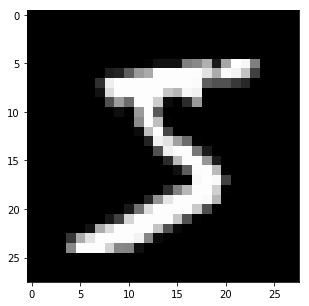

None


In [ ]:
plt.figure(figsize: [5,5])
let fig = plt.imshow(X:img, cmap:"gray")
plt.show(fig)

## Matmul

In [ ]:
extension RandomDistribution {
    // Returns a batch of samples.
    func next<G: RandomNumberGenerator>(
        _ count: Int, using generator: inout G
    ) -> [Sample] {
        var result: [Sample] = []
        for _ in 0..<count {
            result.append(next(using: &generator))
        }
        return result
    }

    // Returns a batch of samples, using the global Threefry RNG.
    func next(_ count: Int) -> [Sample] {
        return next(count, using: &ThreefryRandomNumberGenerator.global)
    }
}

let dist = NormalDistribution<Float>(mean: 0, standardDeviation: 1)

In [ ]:
var weights = Tensor(dist.next(7840)).reshaped(toShape: Tensor([784, 10])) / sqrt(784)
var bias = Tensor(repeating: 0.0, shape: [10])

### From scratch

In [ ]:
func swift_matmul(a:[Float], b:[Float], a_shape:[Int], b_shape:[Int]) -> [Float]{
    var res:[Float] = Array(repeating: 0.0, count: a_shape[0] * b_shape[1])
    for i in 0..<a_shape[0]{
        for j in 0..<b_shape[1]{
            for k in 0..<a_shape[1]{
                res[i + a_shape[0] * j] += a[i + a_shape[0]*k] * b[k + b_shape[0]*j]
            }
        }
    }
    return res
}

In [ ]:
var flat_a = x_train[0..<5].array.scalars
var flat_b = weights.array.scalars

In [ ]:
let res = swift_matmul(a: flat_a, b:flat_b, a_shape:[5,784], b_shape:[784,10])

In [ ]:
time(repeating: 100) { let _ = swift_matmul(a: flat_a, b:flat_b, a_shape:[5,784], b_shape:[784,10])}

0.23575261000000008 ms


In [ ]:
let m1 = x_train[0..<5]
let m2 = weights

In [ ]:
time(repeating: 100) { let _ = Raw.matMul(m1, m2)}

1.9921793000000003 ms


### Export

In [ ]:
export_notebooks(Path.cwd)

Converting 00_load_data.ipynb
Converting 01_matmul.ipynb
